In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
yfin.pdr_override()
start='2013-02-15'
end=dt.datetime.now()
df = pdr.get_data_yahoo('BTC-USD', start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-14,49733.445312,52021.371094,49296.832031,51826.695312,51826.695312,39105608050
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,51938.554688,38564360533
2024-02-16,51937.726562,52537.968750,51641.367188,52160.203125,52160.203125,28180567298
2024-02-17,52161.675781,52191.914062,50669.667969,51662.996094,51662.996094,20009091006
2024-02-18,51661.968750,51762.847656,51234.710938,51572.046875,51572.046875,21511557120


In [6]:
df=df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


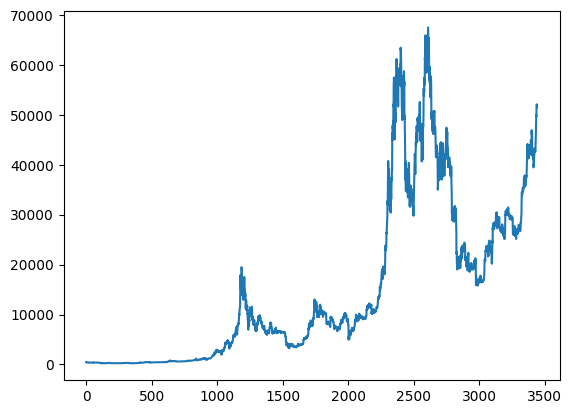

In [9]:
plt.plot(df.Close)

In [10]:
ma100=df.Close.rolling(100).mean()

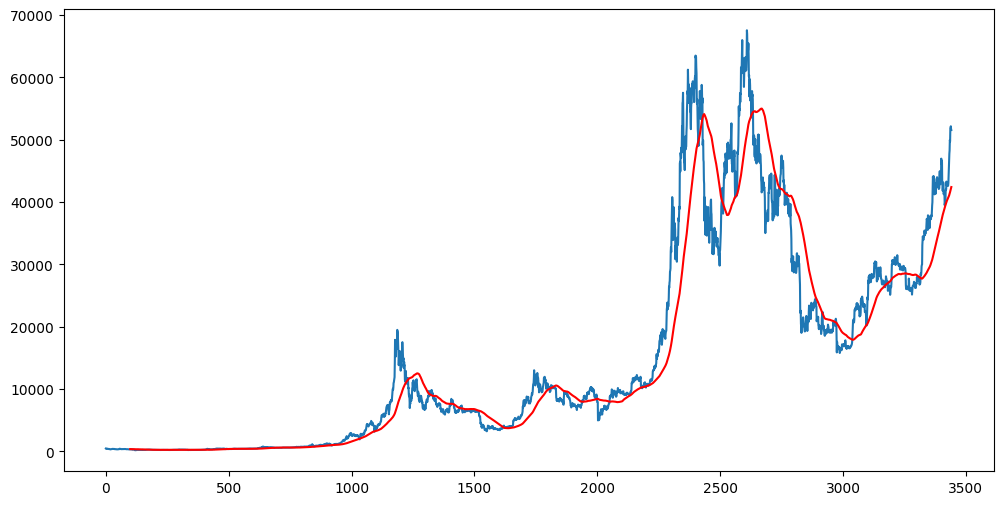

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200=df.Close.rolling(200).mean()

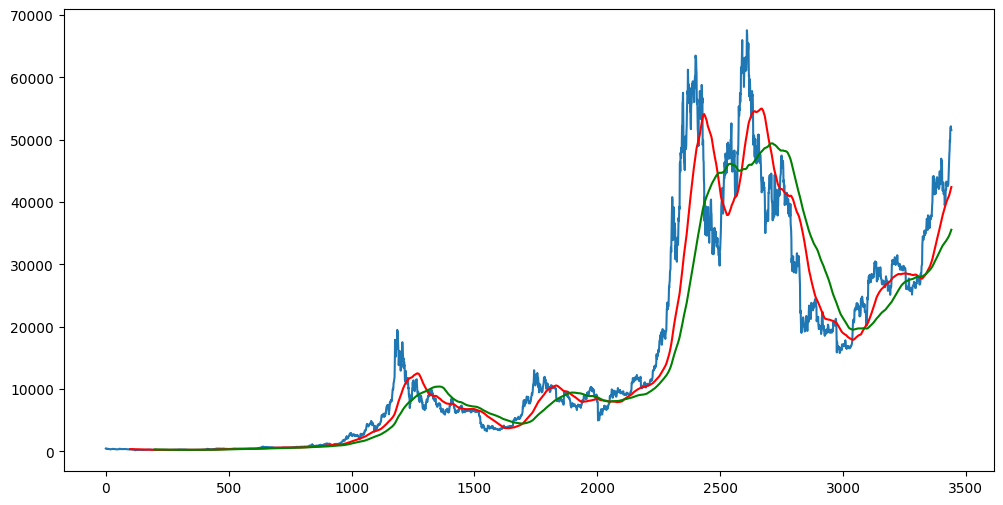

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(3442, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442 entries, 0 to 3441
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3442 non-null   float64
 1   High    3442 non-null   float64
 2   Low     3442 non-null   float64
 3   Close   3442 non-null   float64
 4   Volume  3442 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 134.6 KB


In [16]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2753, 1)
(689, 1)


In [18]:
data_training.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [19]:
data_testing.tail()

,Close
3437,51826.695312
3438,51938.554688
3439,52160.203125
3440,51662.996094
3441,51572.046875


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)

In [23]:
data_training_array

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.70171423],
       [0.69573302],
       [0.67311813]])

In [24]:
x_train=[]
y_train=[]


for i in range(200,data_training_array.shape[0]):
  x_train.append(data_training_array[i-200:i])
  y_train.append(data_training_array[i,0])


x_train,y_train = np.array(x_train),np.array(y_train)

In [25]:
y_train.shape

(2553,)

In [26]:
x_train.shape

(2553, 200, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=250,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=300,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=350,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=400,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 250)          252000    
                                                                 
 dropout (Dropout)           (None, 200, 250)          0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 300)          661200    
                                                                 
 dropout_1 (Dropout)         (None, 200, 300)          0         
                                                                 
 lstm_2 (LSTM)               (None, 200, 350)          911400    
                                                                 
 dropout_2 (Dropout)         (None, 200, 350)          0         
                                                                 
 lstm_3 (LSTM)               (None, 400)               1

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
40/40 [==============================] - 61s 1s/step - loss: 0.0218
Epoch 2/200
40/40 [==============================] - 40s 1s/step - loss: 0.0032
Epoch 3/200
40/40 [==============================] - 39s 990ms/step - loss: 0.0027
Epoch 4/200
40/40 [==============================] - 39s 989ms/step - loss: 0.0025
Epoch 5/200
40/40 [==============================] - 40s 1s/step - loss: 0.0024
Epoch 6/200
40/40 [==============================] - 39s 960ms/step - loss: 0.0022
Epoch 7/200
40/40 [==============================] - 38s 958ms/step - loss: 0.0026
Epoch 8/200
40/40 [==============================] - 38s 965ms/step - loss: 0.0024
Epoch 9/200
40/40 [==============================] - 40s 992ms/step - loss: 0.0023
Epoch 10/200
40/40 [==============================] - 39s 959ms/step - loss: 0.0021
Epoch 11/200
40/40 [==============================] - 39s 965ms/step - loss: 0.0024
Epoch 12/200
40/40 [==============================] - 38s 963ms/step - loss: 0.0025
Epoch 13/2

In [27]:
model.save('keras_modellll.h5')

NameError: name 'model' is not defined

In [36]:
from tensorflow.keras.models import load_model

model = load_model('/content/keras_mode_final.h5')

In [37]:
data_testing.tail()

,Close
3437,51826.695312
3438,51938.554688
3439,52160.203125
3440,51662.996094
3441,51572.046875


In [38]:
past_200_days=data_training.tail(200)

In [39]:
past_200_days.tail()

,Close
2748,46820.492188
2749,47128.003906
2750,47465.730469
2751,47062.664062
2752,45538.675781


In [40]:
final_df=past_200_days.append(data_testing,ignore_index=True)

<ipython-input-40-fd8b9ca089d8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_200_days.append(data_testing,ignore_index=True)


In [41]:
input_data=scaler.fit_transform(final_df)

In [42]:
input_data.shape

(889, 1)

In [43]:
x_test=[]
y_test=[]

for i in range(200,input_data.shape[0]):
  x_test.append(input_data[i-200:i])
  y_test.append(input_data[i,0])


x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(689, 200, 1)
(689,)


In [44]:
x_test.shape

(689, 200, 1)

In [45]:
y_predicted2=model.predict(x_test)

22/22 [==============================] - 17s 729ms/step


In [46]:
y_predicted2=scaler.inverse_transform(y_predicted2)

In [47]:
y_test=np.array(y_test)

In [48]:
y_test=y_test.reshape(y_test.shape[0],1)

In [49]:
y_test.shape

(689, 1)

In [50]:
y_test=scaler.inverse_transform(y_test)

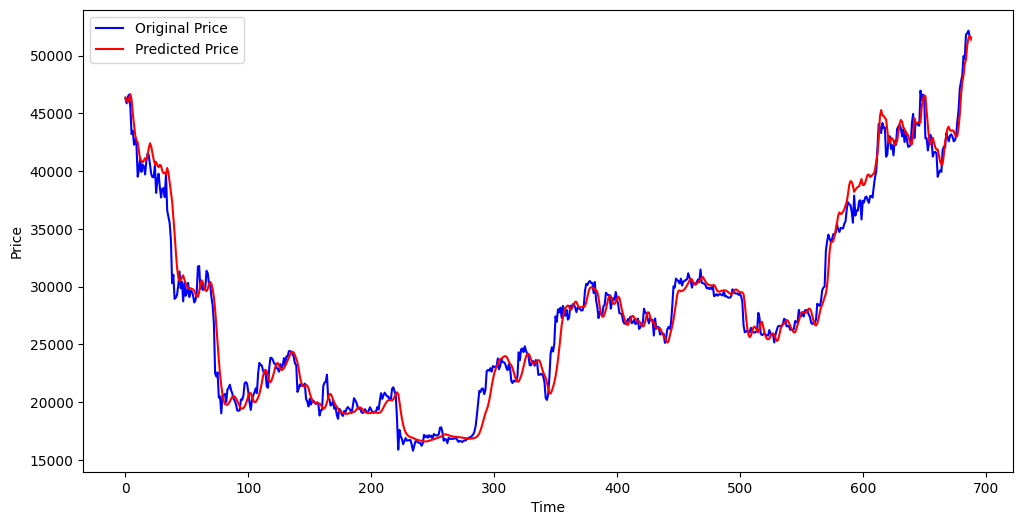

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted2,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
y_predicted=model.predict(x_train)

80/80 [==============================] - 63s 780ms/step


In [53]:
y_train

array([0.00122417, 0.0011484 , 0.00111409, ..., 0.70171423, 0.69573302,
       0.67311813])

In [54]:
y_train=np.array(y_train)
y_train=y_train.reshape(y_train.shape[0],1)
y_train=scaler.inverse_transform(y_train)

In [55]:
y_train

array([[15850.67094382],
       [15846.74765092],
       [15844.9711681 ],
       ...,
       [52121.72707195],
       [51812.02252337],
       [50641.03408233]])

In [56]:
y_predicted=scaler.inverse_transform(y_predicted)

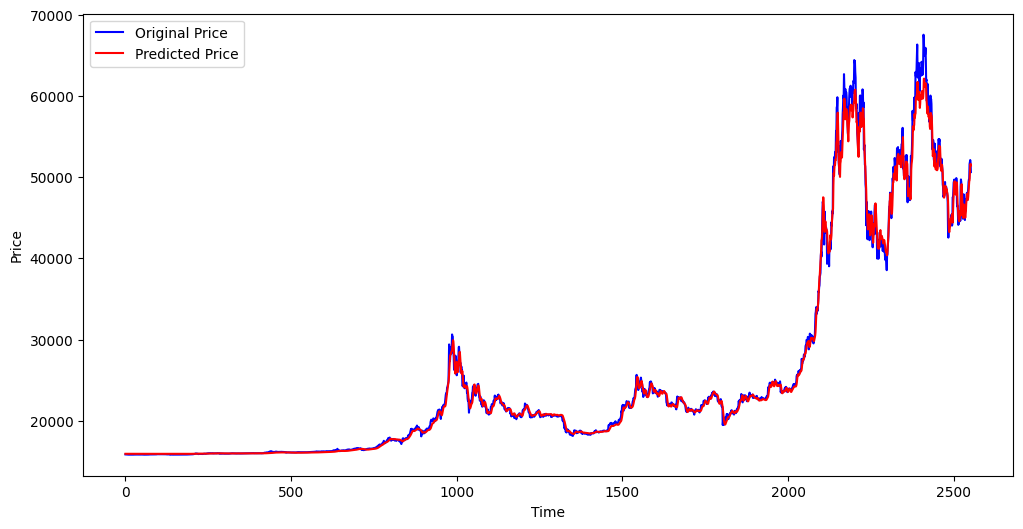

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_train,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,y_predicted)))
print("Train data MSE: ", mean_squared_error(y_train,y_predicted))
print("Train data MAE: ", mean_absolute_error(y_train,y_predicted))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,y_predicted2)))
print("Test data MSE: ", mean_squared_error(y_test,y_predicted2))
print("Test data MAE: ", mean_absolute_error(y_test,y_predicted2))

Train data RMSE:  868.0404076638515
Train data MSE:  753494.1493372256
Train data MAE:  437.49505181400883
-------------------------------------------------------------------------------------
Test data RMSE:  1314.142630771041
Test data MSE:  1726970.8540098327
Test data MAE:  895.9525240384613


In [59]:
print("Train data R2 score:", r2_score(y_train, y_predicted))
print("Test data R2 score:", r2_score(y_test, y_predicted2))

Train data R2 score: 0.995418956089198
Test data R2 score: 0.9751877454380234


In [60]:
input_data.shape

(889, 1)

In [61]:
x_test2=[]
x_test2.append(input_data[input_data.shape[0]-200:input_data.shape[0]])
x_test2=np.array(x_test2)
x_test2.shape

(1, 200, 1)

In [62]:
input_data.shape

(889, 1)

In [63]:
inputt=input_data
inputt.shape

(889, 1)

In [99]:
x_test2=[]
y_predicted_new=[]

inputtt=input_data

for i in range(7):
  x_test2.append(inputtt[inputtt.shape[0]-200-2:inputtt.shape[0]-2])
  x_test2=np.array(x_test2)
  x_test2=np.reshape(x_test2, (1, x_test2.shape[1], 1))
  y_temp=model.predict(x_test2)
  print(y_temp)
  x_test2 = []
  y_predicted_new.append(y_temp[0])
  # inputtt.append(np.array(y_temp[0]))
  inputtt=np.append(inputtt, [np.array(y_temp[0])], axis=0)


print(np.array(x_test2).shape)


1/1 [==============================] - 0s 221ms/step
[[0.69418454]]
1/1 [==============================] - 0s 215ms/step
[[0.6875936]]
1/1 [==============================] - 0s 204ms/step
[[0.68236125]]
1/1 [==============================] - 0s 267ms/step
[[0.6831784]]
1/1 [==============================] - 0s 204ms/step
[[0.6811644]]
1/1 [==============================] - 0s 160ms/step
[[0.67651594]]
1/1 [==============================] - 0s 198ms/step
[[0.6743368]]
(0,)


In [100]:
y_predicted_new=np.array(y_predicted_new)
y_predicted_new

array([[0.69418454],
       [0.6875936 ],
       [0.68236125],
       [0.6831784 ],
       [0.6811644 ],
       [0.67651594],
       [0.6743368 ]], dtype=float32)

In [101]:
y_predicted_new=scaler.inverse_transform(y_predicted_new)

In [102]:

y_predicted_new

array([[51731.844],
       [51390.566],
       [51119.637],
       [51161.95 ],
       [51057.664],
       [50816.97 ],
       [50704.133]], dtype=float32)

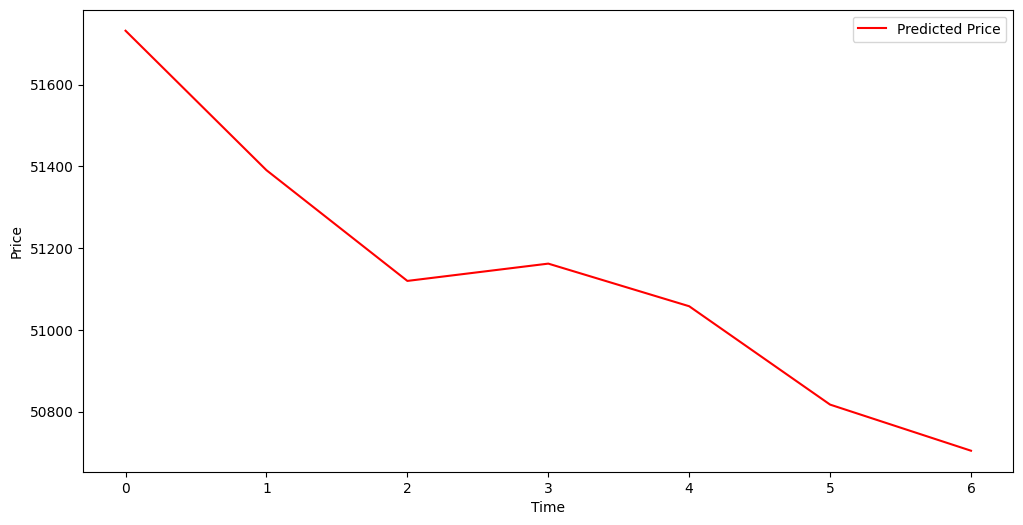

In [103]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted_new,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

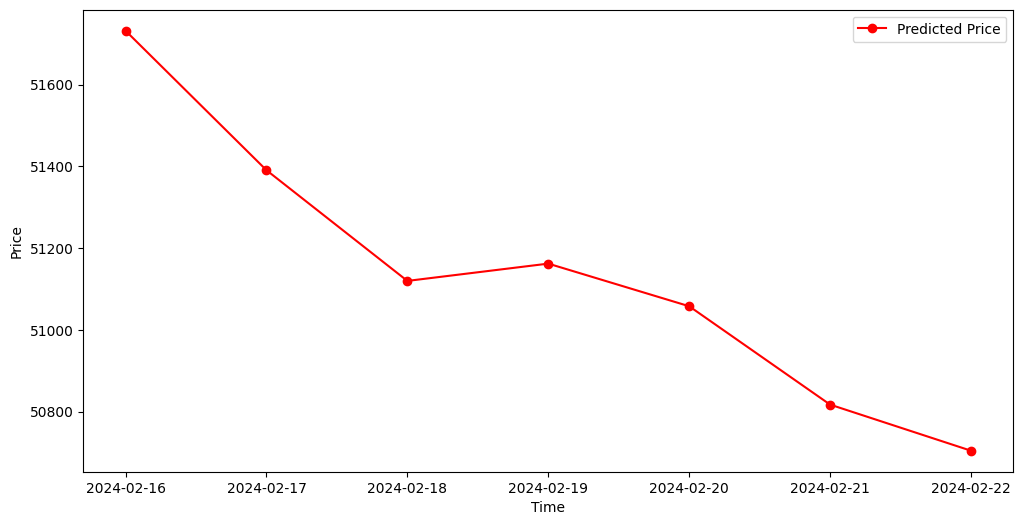

In [105]:
today = dt.date.today()

dates = [today - dt.timedelta(days=i) for i in range(2, -5, -1)]


plt.figure(figsize=(12, 6))
plt.plot(dates, y_predicted_new, 'r', marker='o', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()


plt.show()